<a href="https://colab.research.google.com/github/cnddlf/2022_1_Study_AI/blob/main/%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C(0302).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. iris 데이터 읽어오기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
import pandas as pd
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
irisDF['target']=iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
irisDF[irisDF['target']==0][:5]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
irisDF[irisDF['target']==0]['sepal_length'][:5]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

0  :  ^
1  :  s
2  :  o


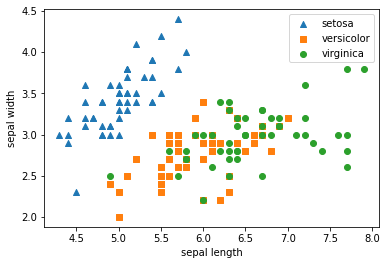

In [ ]:
import matplotlib.pyplot as plt

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    print(i, ' : ', marker)
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


> 데이터 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris.data)
iris_scaled = scaler.transform(iris.data)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
iris_scaled = StandardScaler().fit_transform(iris.data)
iris_scaled

In [ ]:
iris_data = irisDF.iloc[:, :-1]
iris_scaled = StandardScaler().fit_transform(iris_data)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris_data)
pca.explained_variance_
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
import numpy as np

x = np.arange(4)
x

array([0, 1, 2, 3])

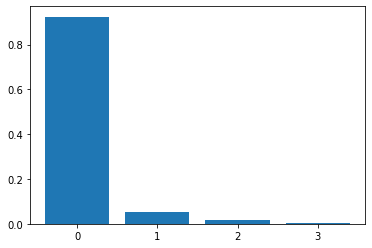

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x, pca.explained_variance_ratio_)
plt.xticks(x, x)

plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape

(150, 2)

In [ ]:
pca_col = ['pca_component1', 'pca_component2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_col)
irisDF_pca.head()

,pca_component1,pca_component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [ ]:
irisDF_pca['target']=iris.target
irisDF_pca.head()

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


0  :  ^
1  :  s
2  :  o


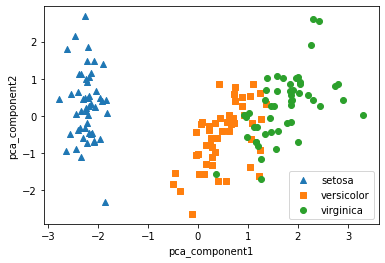

In [ ]:
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    print(i, ' : ', marker)
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 모델 로드
dt_clf = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, iris.data, iris.target, scoring='accuracy', cv=3)
np.mean(scores)

0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score

# target을 제외한 데이터 분리
pca_X = irisDF_pca[['pca_component1', 'pca_component2']]
pca_y = irisDF_pca[['target']]


# scores = cross_val_score(dt_clf, pca_X, iris.target, scoring='accuracy', cv=3)
scores = cross_val_score(dt_clf, pca_X, pca_y, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.9  0.9  0.88]
원본 데이터 평균 정확도: 0.8933333333333334
